# 📘 Para-Procesimi i të Dhënave për Analizë
## Tema: Analiza e të dhënave të shitjeve (Superstore Dataset)

Ky notebook përmban hapat e detajuar të para-procesimit për dataset-in **Superstore**.
Procesi përfshin:
- Ngarkimin dhe inspektimin e të dhënave
- Trajtimin e tipeve të dhënave dhe vlerave të zbrazëta
- Pastrimin, agregimin dhe mostrimin
- Diskretizimin, binarizimin dhe transformimet
- Reduktimin e dimensioneve me PCA

**👩‍🎓 Studentja:** Anjeza Sfishta  <br>
**📚 Lënda:** Përgatitja dhe vizualizimi i të dhënave  

## 🧩 Importimi i librarive
Në këtë seksion importojmë libraritë kryesore që do të përdorim gjatë para-procesimit.


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Binarizer, KBinsDiscretizer
from sklearn.decomposition import PCA

print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)

Pandas version: 2.2.2
Seaborn version: 0.13.2


## 📥 Ngarkimi i të dhënave
Lexojmë dataset-in dhe shikojmë rreshtat e parë për të kuptuar strukturën e tij.


In [94]:
df = pd.read_csv('superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 🔍 Inspektimi dhe cilësia e të dhënave
Analizojmë tipet, mungesat dhe statistikat për të vlerësuar cilësinë e dataset-it.


In [95]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## 🧹 Pastrimi i të dhënave
Heqim duplikatet dhe rreshtat me vlera të zbrazëta, si dhe konvertojmë kolonat e datës në formatin e duhur.


In [96]:
df = df.drop_duplicates()
#df = df.dropna()
for col in ['Sales']:
    df[col].fillna(df[col].median(), inplace=True)
    
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

invalid_dates = df[df['Order Date'].isna() | df['Ship Date'].isna()]
print(f"Rreshta me data të pavlefshme: {len(invalid_dates)}")

print("✅ Të dhënat u pastruan dhe datat u konvertuan me sukses!")

Rreshta me data të pavlefshme: 7124
✅ Të dhënat u pastruan dhe datat u konvertuan me sukses!


C:\Users\HP\AppData\Local\Temp\ipykernel_9548\1084206333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


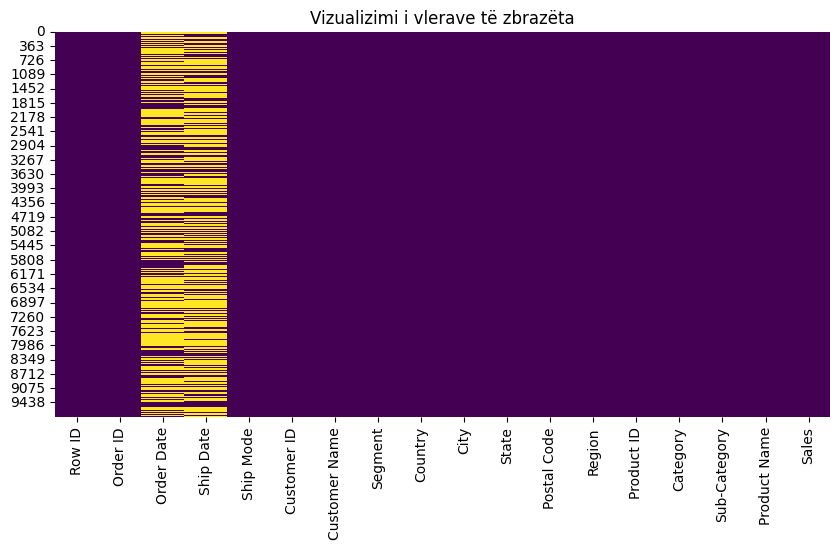

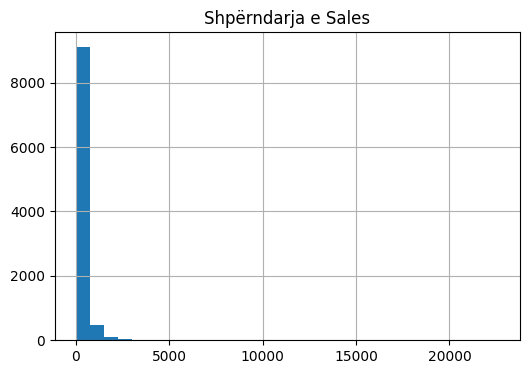

In [97]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Vizualizimi i vlerave të zbrazëta')
plt.show()

df[['Sales']].hist(bins=30, figsize=(6,4))
plt.title('Shpërndarja e Sales')
plt.show()

## ⚙️ Diskretizimi, Binarizimi dhe Standardizimi
Kryejmë:
- **Diskretizimin** e kolonës `Sales` në 4 intervale  
- **Binarizimin** e kolonës `Profit` për të ndarë fitimet nga humbjet  
- **Standardizimin** e kolonave numerike për t’i sjellë në një shkallë të përbashkët


In [98]:
# Diskretizimi i kolonës 'Sales' në 4 intervale
disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df['Sales_binned'] = disc.fit_transform(df[['Sales']])

# Binarizimi i kolonës 'Sales' sipas mesatares (1 = Shitje e lartë, 0 = Shitje e ulët)
threshold = df['Sales'].mean()
binarizer = Binarizer(threshold=threshold)
df['Sales_binary'] = binarizer.fit_transform(df[['Sales']])

# Standardizimi i kolonave numerike
scaler = StandardScaler()
df[['Row ID', 'Postal Code', 'Sales']] = scaler.fit_transform(df[['Row ID', 'Postal Code', 'Sales']])

print("✅ Diskretizimi, binarizimi dhe standardizimi u kryen me sukses!")
df[['Sales', 'Sales_binned', 'Sales_binary']].head()


✅ Diskretizimi, binarizimi dhe standardizimi u kryen me sukses!


,Sales,Sales_binned,Sales_binary
0,0.049776,3.0,1.0
1,0.799801,3.0,1.0
2,-0.344944,0.0,0.0
3,1.159887,3.0,1.0
4,-0.332580,1.0,0.0


## 🔗 Correlation Matrix për kolonat numerike


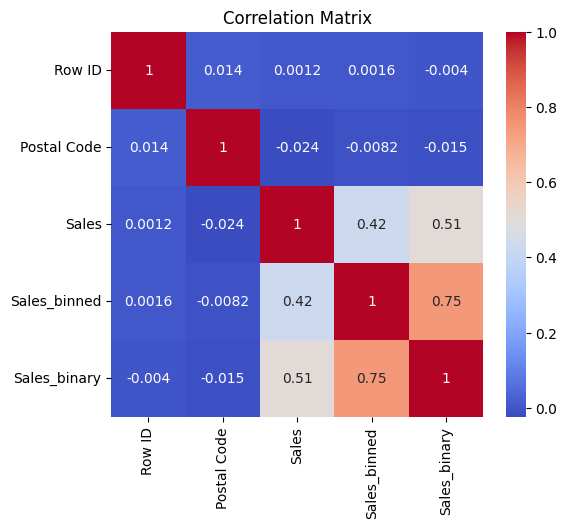

In [99]:
# Gjej kolonat numerike automatikisht
num_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 🎯 Reduktimi i dimensioneve me PCA
Përdorim **PCA (Principal Component Analysis)** për të reduktuar dimensionet e të dhënave dhe për të vizualizuar strukturën e tyre.


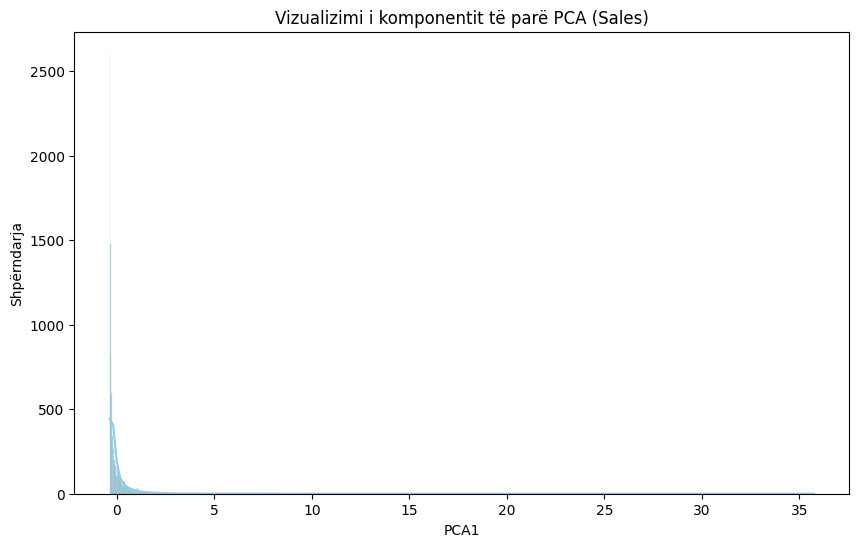

Varianca e kapur nga PCA1: 1.00


In [100]:
pca = PCA(n_components=1)
pca_data = pca.fit_transform(df[['Sales']])
df['PCA1'] = pca_data[:, 0]

plt.figure(figsize=(10,6))
sns.histplot(df['PCA1'], kde=True, color='skyblue', alpha=0.6)
plt.title('Vizualizimi i komponentit të parë PCA (Sales)')
plt.xlabel('PCA1')
plt.ylabel('Shpërndarja')
plt.show()

explained_variance = pca.explained_variance_ratio_[0]
print(f"Varianca e kapur nga PCA1: {explained_variance:.2f}")

## 🧠 Krijimi i veçorive të reja
Shtohet veçoria e re `Delivery_Days` që tregon kohën e dërgesës për çdo porosi.


In [101]:
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df[['Order Date', 'Ship Date', 'Delivery_Days']].head()

,Order Date,Ship Date,Delivery_Days
0,2017-08-11,2017-11-11,92.0
1,2017-08-11,2017-11-11,92.0
2,2017-12-06,NaT,NaN
3,2016-11-10,NaT,NaN
4,2016-11-10,NaT,NaN


## 📊 Mostrim dhe Agregim i të Dhënave

Në këtë seksion do të kryejmë disa analiza përmbledhëse duke përdorur funksione të tilla si:
- `groupby()` për të grupuar të dhënat sipas kategorive ose rajoneve
- `agg()` për të llogaritur mesatare, total dhe numërime
- `sample()` për të marrë mostra të rastësishme nga dataset-i

Këto analiza ndihmojnë për të kuptuar shpërndarjen e shitjeve dhe fitimeve sipas rajonit, kategorisë ose segmentit të klientit.


🧩 Shembuj Praktikë

1. Mostrim i rastësishëm (5 rreshta)

In [102]:
print("Mostër e rastësishme nga dataset-i:")
display(df.sample(5))


Mostër e rastësishme nga dataset-i:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales_binned,Sales_binary,PCA1,Delivery_Days
2932,-0.695471,CA-2016-168564,2016-08-08,2016-08-08,Same Day,TT-21220,Thomas Thornton,Consumer,United States,San Francisco,...,West,FUR-CH-10000785,Furniture,Chairs,Global Ergonomic Managers Chair,-0.137220,2.0,0.0,-0.137220,0.0
150,-1.678852,CA-2017-114489,2017-05-12,2017-09-12,Standard Class,JE-16165,Justin Ellison,Corporate,United States,Franklin,...,Central,OFF-BI-10002735,Office Supplies,Binders,GBC Prestige Therm-A-Bind Covers,-0.094506,2.0,0.0,-0.094506,123.0
3414,-0.525094,CA-2017-100244,NaT,NaT,Standard Class,GM-14695,Greg Maxwell,Corporate,United States,San Francisco,...,West,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,-0.290653,1.0,0.0,-0.290653,NaN
5185,0.100918,CA-2016-134719,2016-10-10,NaT,Standard Class,JD-15790,John Dryer,Consumer,United States,Jacksonville,...,South,OFF-ST-10004459,Office Supplies,Storage,Tennsco Single-Tier Lockers,2.506883,3.0,1.0,2.506883,NaN
4272,-0.221809,US-2018-158505,NaT,NaT,Same Day,SF-20200,Sarah Foster,Consumer,United States,Murray,...,West,TEC-PH-10004071,Technology,Phones,PayAnywhere Card Reader,-0.253489,2.0,0.0,-0.253489,NaN


2. Mesatarja e shitjeve dhe fitimit sipas Rajonit

In [103]:
print("\nMesatarja e shitjeve dhe fitimit sipas Rajonit:")
region_summary = df.groupby('Region')[['Sales']].mean().reset_index()
display(region_summary)


Mesatarja e shitjeve dhe fitimit sipas Rajonit:


,Region,Sales
0,Central,-0.022998
1,East,0.015372
2,South,0.020355
3,West,-0.007316


3. Totali i shitjeve dhe fitimit sipas Kategorisë së Produktit

In [104]:
print("\nTotali i shitjeve dhe fitimit sipas Kategorisë së Produktit:")
category_summary = df.groupby('Category')[['Sales',]].sum().reset_index()
display(category_summary)


Totali i shitjeve dhe fitimit sipas Kategorisë së Produktit:


,Category,Sales
0,Furniture,397.562333
1,Office Supplies,-1050.384829
2,Technology,652.822496


4. Numri i porosive sipas Segmentit të Klientit

In [105]:
print("\nNumri i porosive sipas Segmentit të Klientit:")
segment_orders = df['Segment'].value_counts().reset_index()
segment_orders.columns = ['Segment', 'Numri i Porosive']
display(segment_orders)


Numri i porosive sipas Segmentit të Klientit:


,Segment,Numri i Porosive
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


5. Vizualizim grafik i shitjeve mesatare sipas Rajonit

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


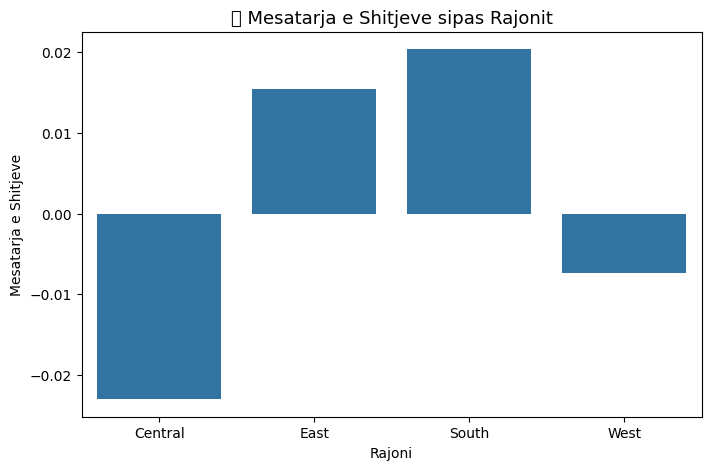

In [106]:
plt.figure(figsize=(8,5))
sns.barplot(data=region_summary, x='Region', y='Sales')
plt.title("💰 Mesatarja e Shitjeve sipas Rajonit", fontsize=13)
plt.xlabel("Rajoni")
plt.ylabel("Mesatarja e Shitjeve")
plt.show()

## 🏁 Përmbledhje përfundimtare
Këtu përmblidhen të gjithë hapat e realizuar gjatë procesit të para-procesimit.  
Dataset-i përfundimtar u ruajt për përdorim të mëtejshëm në analizë apo modelim.


In [107]:
print("✅ Para-procesimi u përfundua me sukses!\n")
print("U kryen këto hapa:")
print("1. Ngarkimi dhe inspektimi i të dhënave")
print("2. Pastrimi dhe konvertimi i tipeve")
print("3. Diskretizimi dhe binarizimi")
print("4. Standardizimi dhe PCA")
print("5. Krijimi i veçorive të reja")

df.to_csv("cleaned_superstore.csv", index=False)
print("\n💾 Të dhënat e pastruara u ruajtën si 'cleaned_superstore.csv'")


✅ Para-procesimi u përfundua me sukses!

U kryen këto hapa:
1. Ngarkimi dhe inspektimi i të dhënave
2. Pastrimi dhe konvertimi i tipeve
3. Diskretizimi dhe binarizimi
4. Standardizimi dhe PCA
5. Krijimi i veçorive të reja

💾 Të dhënat e pastruara u ruajtën si 'cleaned_superstore.csv'
